# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [57]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [3]:
arr=np.random.randint(10,size=(5,3))
df=pd.DataFrame(arr)
print(df)

   0  1  2
0  5  0  5
1  4  2  9
2  3  2  8
3  8  5  4
4  0  9  2


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

Labelling is same for both starting from 0, 1, 2, 3 and so on

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [5]:
cities=["NYC","LA","LV","Washington","Miami"]
months={"jan":[1,2,3,4,5],
        "feb":[1,2,3,4,5],
        "mar":[1,2,3,4,5]}
df=pd.DataFrame(months,index=cities)
print(df)

            jan  feb  mar
NYC           1    1    1
LA            2    2    2
LV            3    3    3
Washington    4    4    4
Miami         5    5    5


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

In [6]:
df=sb.get_dataset_names()
print(df)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [9]:
 df_homes=pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [12]:
df_homes.to_csv("zillow_home_data.csv")

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [14]:
df_homes_2=pd.read_csv("zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [15]:
s1=df_homes.shape
s2=df_homes_2.shape

if s1==s2:print("equal")
else:
  min=min(s1[0],s2[0])
  df_homes=df_homes.iloc[:min,:]
  df_homes_2=df_homes_2.iloc[:min,:]

equal


**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [16]:
file_url = 'https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx'

feb = pd.read_excel(file_url, sheet_name='February 2022')

print(feb)

   Unnamed: 0  This Month  Last Month  Month to Month Increase
0       Users        1800         280                 5.428571
1   New Users        1700         298                 4.704698
2  Page Views        2534         436                 4.811927


**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [17]:
feb['Percentage Increase'] = ((feb['This Month'] - feb['Last Month']) / feb['Last Month']) * 100

print(feb[['This Month', 'Last Month', 'Percentage Increase']])

   This Month  Last Month  Percentage Increase
0        1800         280           542.857143
1        1700         298           470.469799
2        2534         436           481.192661


## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [19]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [20]:
print(df_penguins.shape)

(344, 7)


**13.** How might you show the first few rows of df_penguins?

In [ ]:
print(df_penguins.head())

**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [21]:
unispe=set()
for i in df_penguins['species']:
  unispe.add(i)
print(unispe)

{'Adelie', 'Gentoo', 'Chinstrap'}


**15.** What function can we use to drop the rows that have missing data?

In [23]:
df_penguins.dropna()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

**16.** By default, will this modify df_penguins or will it return a copy?

**17.** How can we override the default?

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [22]:
df_penguins_full=df_penguins.dropna()

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [24]:
print(df_penguins_full['bill_length_mm'].mean())

43.99279279279279


**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

density of bill remains same, so equally correlated

**21.** How could you show the median flipper length, grouped by species?

In [25]:
print(df_penguins_full.groupby('species')['flipper_length_mm'].median())

species
Adelie       190.0
Chinstrap    196.0
Gentoo       216.0
Name: flipper_length_mm, dtype: float64


**22.** Which species has the longest flippers?

gentoo

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

gentoo

In [27]:
print(df_penguins_full.groupby('species')['body_mass_g'].mean())

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64


**24.** How could you sort the rows by bill length?

In [28]:
df_penguins_full.sort_values("bill_length_mm")

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
142     Adelie      Dream            32.1           15.5              188.0   
98      Adelie      Dream            33.1           16.1              178.0   
70      Adelie  Torgersen            33.5           19.0              190.0   
92      Adelie      Dream            34.0           17.1              185.0   
18      Adelie  Torgersen            34.4           18.4              184.0   
..         ...        ...             ...            ...                ...   
335     Gentoo     Biscoe            55.1           16.0              230.0   
215  Chinstrap      Dream            55.8           19.8              207.0   
321     Gentoo     Biscoe            55.9           17.0              228.0   
169  Chinstrap      Dream            58.0           17.8              181.0   
253     Gentoo     Biscoe            59.6           17.0              230.0   

     body_mass_g     sex  
142       3050.0  Female  
98        2900.0  Female  
70        3600.0  Female  
92        3400.0  Female  
18        3325.0  Female  
..           ...     ...  
335       5850.0    Male  
215       4000.0    Male  
321       5600.0    Male  
169       3700.0  Female  
253       6050.0    Male  

[333 rows x 7 columns]

**25.** How could you run the same sort in descending order?

In [29]:
df_penguins_full.sort_values("bill_length_mm")[::-1]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
253     Gentoo     Biscoe            59.6           17.0              230.0   
169  Chinstrap      Dream            58.0           17.8              181.0   
321     Gentoo     Biscoe            55.9           17.0              228.0   
215  Chinstrap      Dream            55.8           19.8              207.0   
335     Gentoo     Biscoe            55.1           16.0              230.0   
..         ...        ...             ...            ...                ...   
18      Adelie  Torgersen            34.4           18.4              184.0   
92      Adelie      Dream            34.0           17.1              185.0   
70      Adelie  Torgersen            33.5           19.0              190.0   
98      Adelie      Dream            33.1           16.1              178.0   
142     Adelie      Dream            32.1           15.5              188.0   

     body_mass_g     sex  
253       6050.0    Male  
169       3700.0  Female  
321       5600.0    Male  
215       4000.0    Male  
335       5850.0    Male  
..           ...     ...  
18        3325.0  Female  
92        3400.0  Female  
70        3600.0  Female  
98        2900.0  Female  
142       3050.0  Female  

[333 rows x 7 columns]

**26.** How could you sort by species first, then by body mass?

In [30]:
df_penguins_full.sort_values(['species','body_mass_g'])

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
58   Adelie     Biscoe            36.5           16.6              181.0   
64   Adelie     Biscoe            36.4           17.1              184.0   
54   Adelie     Biscoe            34.5           18.1              187.0   
98   Adelie      Dream            33.1           16.1              178.0   
116  Adelie  Torgersen            38.6           17.0              188.0   
..      ...        ...             ...            ...                ...   
331  Gentoo     Biscoe            49.8           15.9              229.0   
297  Gentoo     Biscoe            51.1           16.3              220.0   
337  Gentoo     Biscoe            48.8           16.2              222.0   
253  Gentoo     Biscoe            59.6           17.0              230.0   
237  Gentoo     Biscoe            49.2           15.2              221.0   

     body_mass_g     sex  
58        2850.0  Female  
64        2850.0  Female  
54        2900.0  Female  
98        2900.0  Female  
116       2900.0  Female  
..           ...     ...  
331       5950.0    Male  
297       6000.0    Male  
337       6000.0    Male  
253       6050.0    Male  
237       6300.0    Male  

[333 rows x 7 columns]

## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [34]:
df_diamonds=sb.load_dataset('diamonds')

**28.** Display the columns that are available.

In [32]:
print(df_diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

float and category

**30.** Select the 'table' column and show its type

In [35]:
print(df_diamonds['table'].dtype)

float64


**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [37]:
subset=df_diamonds[['price','carat']].head(10)
print(subset)

   price  carat
0    326   0.23
1    326   0.21
2    327   0.23
3    334   0.29
4    335   0.31
5    336   0.24
6    336   0.24
7    337   0.26
8    337   0.22
9    338   0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [38]:
print(df_diamonds['color'].dtype)

category


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [39]:
row=df_diamonds.iloc[0]
print(row)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [40]:
print(type(row))

<class 'pandas.core.series.Series'>


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [41]:
print(df_diamonds.iloc[33])

carat           0.23
cut        Very Good
color              E
clarity          VS1
depth           59.5
table           58.0
price            402
x               4.01
y               4.06
z                2.4
Name: 33, dtype: object


**36.** Select the row with the highest priced diamond.

In [44]:
print(df_diamonds.iloc[df_diamonds['price'].idxmax()])

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table         60.0
price        18823
x              8.5
y             8.47
z             5.16
Name: 27749, dtype: object


**37.** Select the row with the lowest priced diamond.

In [45]:
print(df_diamonds.iloc[df_diamonds['price'].idxmin()])

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [46]:
taxi=sb.load_dataset('taxis')

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [47]:
taxi['pickup_time']=pd.to_datetime(taxi['pickup'])
print(taxi['pickup_time'])

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup_time, Length: 6433, dtype: datetime64[ns]


**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [50]:
taxi['taxis_one_day']=taxi['pickup_time'].between('2019-03-23','2019-03-24')
print(taxi[taxi['taxis_one_day']])

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
8    2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0   
17   2019-03-23 20:50:49 2019-03-23 21:02:07           1      2.60  10.5   
117  2019-03-23 09:39:25 2019-03-23 09:56:45           0      3.60  15.5   
144  2019-03-23 18:35:01 2019-03-23 18:47:39           1      3.20  12.5   
...                  ...                 ...         ...       ...   ...   
6325 2019-03-23 20:52:40 2019-03-23 21:10:12           1      3.62  14.5   
6331 2019-03-23 11:27:00 2019-03-23 12:20:11           1      7.67  28.0   
6338 2019-03-23 18:05:38 2019-03-23 18:25:36           1      2.82  14.0   
6427 2019-03-23 18:26:09 2019-03-23 18:49:12           1      7.07  20.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   

       tip  tolls  total   color      payment                     pickup_zone  \
0     

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [54]:
df_means=taxi.select_dtypes(include=np.number).groupby(taxi['pickup_time'].dt.hour).mean()
print(df_means)

             passengers  distance       fare       tip     tolls      total
pickup_time                                                                
0              1.590244  3.626098  14.039024  2.192829  0.196683  19.639268
1              1.763636  3.196636  12.150000  2.027182  0.104727  17.529636
2              1.514851  3.237030  12.069307  1.691287  0.057030  17.040891
3              1.567164  3.445373  12.470149  1.614776  0.085970  17.414925
4              1.666667  4.422632  15.447368  2.394912  0.671754  22.024561
5              1.490196  5.134902  16.774510  2.910784  0.903529  23.673137
6              1.422535  3.324437  13.296761  1.523732  0.243380  17.704014
7              1.457014  3.317964  13.099729  1.833891  0.459457  18.201900
8              1.485623  2.630319  12.224473  1.783994  0.239233  17.025974
9              1.579937  2.706364  12.865423  1.837931  0.306959  17.751223
10             1.507692  2.757046  12.994985  1.875385  0.230400  17.821385
11          

**42.** Create a simple line plot of the value "distance".  

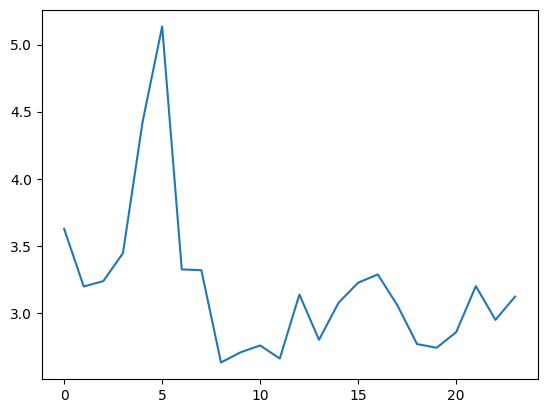

In [58]:
plt.plot(df_means['distance'])

**43.** Overall, do riders travel further or less far as the day progresses?

They travel less and less further as night approaches

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [60]:
taxi['tip_in_percent']=taxi['tip']*100/taxi['fare']
print(taxi['tip_in_percent'])

0       30.714286
1        0.000000
2       31.466667
3       22.777778
4       12.222222
          ...    
6428    23.555556
6429     0.000000
6430     0.000000
6431     0.000000
6432    22.400000
Name: tip_in_percent, Length: 6433, dtype: float64


**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [61]:
taxi['time_interval']=range(len(taxi))
print(taxi['time_interval'])

0          0
1          1
2          2
3          3
4          4
        ... 
6428    6428
6429    6429
6430    6430
6431    6431
6432    6432
Name: time_interval, Length: 6433, dtype: int64


Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [63]:
numeric_taxi = taxi.select_dtypes(include=np.number)

correlations = numeric_taxi.corr()

print(correlations)

                passengers  distance      fare       tip     tolls     total  \
passengers        1.000000  0.009411  0.007637  0.021099 -0.002903  0.015708   
distance          0.009411  1.000000  0.920108  0.452589  0.635267  0.904676   
fare              0.007637  0.920108  1.000000  0.488612  0.609307  0.974358   
tip               0.021099  0.452589  0.488612  1.000000  0.413619  0.646186   
tolls            -0.002903  0.635267  0.609307  0.413619  1.000000  0.683142   
total             0.015708  0.904676  0.974358  0.646186  0.683142  1.000000   
tip_in_percent    0.029909 -0.127746 -0.139866  0.557464 -0.012138  0.008618   
time_interval    -0.056183  0.034017  0.030036 -0.127919 -0.013578 -0.032786   

                tip_in_percent  time_interval  
passengers            0.029909      -0.056183  
distance             -0.127746       0.034017  
fare                 -0.139866       0.030036  
tip                   0.557464      -0.127919  
tolls                -0.012138      -0.

**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

tip_in_percent and distance

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

overall, yes

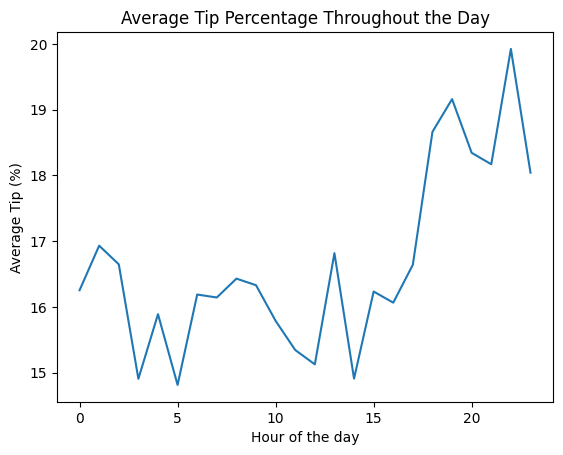

In [70]:
taxi['tip_in_percent'] = (taxi['tip'] / taxi['fare']) * 100

df_means = taxi.groupby(taxi['pickup_time'].dt.hour).mean(numeric_only=True)

plt.plot(df_means['tip_in_percent'])
plt.xlabel('Hour of the day')
plt.ylabel('Average Tip (%)')
plt.title('Average Tip Percentage Throughout the Day')
plt.show()